<a href="https://colab.research.google.com/github/ruifeng5/Githomework1/blob/master/Copy_of_CS441_HW1_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS441: Applied ML - HW 1

### Part I: MNIST Classification

Include all the code for Part 1 in this section

In [6]:
# initialization code
import numpy as np
import math
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression

# loads MNIST data and reformat to 768-d vectors with values in range 0 to 1
# splits into train/val/test sets and provides indices for subsets of train
def load_mnist():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = np.reshape(x_train, (len(x_train), 28*28))
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval
  x_test = x_test/maxval
  x_val = x_train[:10000]
  y_val = y_train[:10000]
  x_train = x_train[10000:]
  y_train = y_train[10000:]
  train_indices = dict()
  train_indices['xs'] = np.arange(50)
  train_indices['s'] = np.arange(500)
  train_indices['m'] = np.arange(5000)
  train_indices['all'] = np.arange(50000)
  return (x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices

# displays a set of mnist images
def display_mnist(x, subplot_rows=1, subplot_cols=1):
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

# counts the number of examples per class
def class_count_mnist(y):
  count = np.zeros((10,),dtype='uint32')
  for i in np.arange(10):
    count[i] = sum(y==i)
  return count

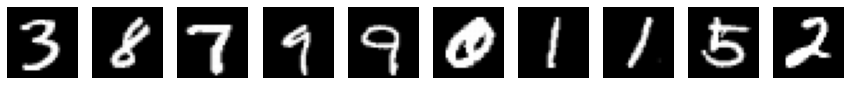

Total size: train=50000, val=10000, test =10000
Train subset size: xs=50, s=500, m=5000, all=50000
Class count for s: [56 57 51 49 46 46 50 51 40 54]


In [7]:
# example of using MNIST load, display, indices, and count functions
(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()
display_mnist(x_train[:10],1,10)
print('Total size: train={}, val={}, test ={}'.format(len(x_train), len(x_val), len(x_test)))
print('Train subset size: xs={}, s={}, m={}, all={}'.format(len(train_indices['xs']),len(train_indices['s']),len(train_indices['m']),len(train_indices['all'])))
print('Class count for s: {}'.format(class_count_mnist(y_train[train_indices['s']])))

In [ ]:
# This is a suggested function definition for KNN, but feel free to change it
def classify_KNN(X_trn, y_trn, X_tst, K=1):
  '''
  Classify each data point in X_tst using a K-nearest neighbor classifier based on (X_trn, y_trn), with L2 distance.   
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. 
         X_tst[i] is the ith example to classify.  K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test label 
  '''
  # needs code here
  N = len(X_trn)
  M = len(X_tst)
  distance = np.zeros([M,N])
  y_pre = np.zeros(M)
  for i in range(M):
    for j in range(N):
      distance[i][j] = math.dist(X_trn[j],X_tst[i])
    index = distance[i].argmin()
    y_pred = y_trn[index]      
  return y_pred
y_pred = classify_KNN(x_train, y_train,x_test,K=1)
print(y_pred)


In [ ]:
# This is a suggested function definition for training Naive Bayes, but feel free to change it
def train_NB_mnist(X, y, alpha=1):
  '''
  Train P(x_f=v|y=c) for each feature f, value v, and class c.  Can assume 10 classes and that the features are binary variables 
  Input: X[i] is the ith training data. y[i] is the ith training label. alpha is the count prior
  Output: return pxy of shape (Nf, 10, 2), where Nf is the number of features; pxy[f,c,v] is P(x_f=v|y=c) 
  '''
  # needs code here
  Nf = len(X[0])
  num_y = 10
  pxy = np.zeros([Nf,num_y,2])
  for i in range(Nf):
    for j in range(num_y):
      for k in range(2):
        num_f = np.sum(X[:,i] == k)
        pxy[i][j][k] = (np.sum((X[:,i] == k)&(y==j))+alpha)/(np.sum(y==j)+alpha*num_f)
  return pxy

# This is a suggested function definition for evauating Naive Bayes, but feel free to change it
def eval_NB_mnist(pxy, X):
  '''
  Evaluate naive bayes for mnist
  Input: pxy is the trained model; X is the test data
  Output: return y_pred, where y_pred[i] is the predicted ith test label  
  '''

  # needs code here
  Nf = len(X[0])
  py = np.zeros(10)
  total = np.sum(y)
  for i in range(10):
    py[i]=np.sum(y==i)/total
  y_pred = np.zeros(len(X))
  temp = np.zeros([Nf,10])

  for j in range(len(X)):
    for k in range(10):
      temp[j][k] = np.log(py[k])
      for l in range(Nf):
        temp[j][k] += np.log(pxy[l][k]) 

  for w in range(len(X)):
    index = temp[w].argmin()
    y_pred = index #看看如何把index转化回y价值

  return y_pred

pxy = train_NB_mnist(x_train, y_train, alpha=1)
y_pred = eval_NB_mnist(pxy,x_test)
print(y_pred)

In [ ]:
# don't forget logistic regression!

In [ ]:
# experiments code

## Part 2: Temperature Regression

Include all your code for part 2 in this section.  You can copy-paste code from part 1 if it is re-usable.

In [ ]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# load data (modify to match your data directory or comment)
def load_temp_data():
  drive.mount('/content/drive')
  datadir = "/content/drive/My Drive/CS441/hw1/" 
  T = np.load(datadir + 'temperature_data.npz')
  x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day = \
  T['x_train'], T['y_train'], T['x_val'], T['y_val'], T['x_test'], T['y_test'], T['dates_train'], T['dates_val'], T['dates_test'], T['feature_to_city'], T['feature_to_day']
  return (x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day)

# plot one data point for listed cities and target temperature
def plot_temps(x, y, cities, feature_to_city, feature_to_day, target_date):
  nc = len(cities)
  ndays = 5
  xplot = np.array([-5,-4,-3,-2,-1])
  yplot = np.zeros((nc,ndays))
  for f in np.arange(len(x)):
    for c in np.arange(nc):
      if cities[c]==feature_to_city[f]:
        yplot[feature_to_day[f]+ndays,c] = x[f]
  plt.plot(xplot,yplot)
  plt.legend(cities)
  plt.plot(0, y, 'b*', markersize=10)
  plt.title('Predict Temp for Cleveland on ' + target_date)
  plt.xlabel('Day')
  plt.ylabel('Avg Temp (C)')
  plt.show()




In [ ]:
# load data (may need to modify file location in preceding cell)
(x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()

# example of displaying information related to a feature index
f = 361
print('Feature {}: city = {}, day= {}'.format(f,feature_to_city[f], feature_to_day[f]))

# example of computing RMSE and median absolute error (for baseline of predicting based on previous day's temperature in Cleveland)
baseline_rmse = np.sqrt(np.mean((y_val[1:]-y_val[:-1])**2)) # root mean squared error
baseline_mae = np.sqrt(np.median(np.abs(y_val[1:]-y_val[:-1]))) # median absolute error
print('Baseline - predict same as previous day: RMSE={}, MAE={}'.format(baseline_rmse, baseline_mae))

# plots temperatures for preceding days for given cities, and target (Cleveland) temp
plot_temps(x_val[0], y_val[0], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[0])
plot_temps(x_val[100], y_val[100], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[1])

In [ ]:
# This is a suggested function definition for KNN, but feel free to change it
def classify_KNN(X_trn, y_trn, X_tst, K=1):
  '''
  Classify each data point in X_tst using a K-nearest neighbor classifier based on (X_trn, y_trn), with L2 distance.   
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test label 
  '''
  # needs code
      
  return y_pred


In [ ]:
# Suggested function definition for NB for temperature regression, but feel free to change 
def train_NB_temp(X, y, std_prior=0):
  '''
  Train NB, assuming that X[f]-y is a Gaussian
  Input: X[i] is the ith training data. y[i] is the ith training label. std_prior is a value to add to std
  Output: return pxy['mu'] and pxy['std'] each with number of values equal to number of features
  '''
  # needs code
  return pxy

def eval_NB_temp(pxy, X):
  '''
  Evaluate naive bayes for temp
  Input: pxy is the trained model; X is the test data
  Output: return y_pred, where y_pred[i] is the predicted ith test value
  '''
  # needs code
  return pred_y

In [ ]:
# Don't forget linear regression!

In [ ]:
# Feature analysis

## Part 3: Stretch Goals
Include all your code used for part 3 in this section. You can copy-paste code from parts 1 or 2 if it is re-usable.